In [1]:
import numpy as np
import matplotlib.pyplot as plt

# CMP Assignment 5
## Andrew Loeppky
## Fall 2020

## Question 1
The Oseen flow is a more complex version of the Stokes flow as it does not completely ignore the inertial force but linearizes it. This leads to an analytical solution of the Navier-Stokes equation, which can be described as a streamfunction (Eq. 8.31, Wang 2012):

$$
\Psi_{Os} = \frac{U_\infty a^2 sin^2\theta}{2}\left(\frac{r}{a}-1\right)^2 \left[\left(1+\frac{3}{16}N_{Re}\right)\left(1+\frac{a}{2r}\right) + \frac{3}{16}N_{Re}\left(1+\frac{a}{r}\right)^2cos\theta\right]
$$

Re-write using a coordinate system where we set $a$ to unity

$$
\Psi_{Os} = \frac{U_\infty sin^2\theta}{2}\left(r-1\right)^2 \left[\left(1+\frac{3}{16}N_{Re}\right)\left(1+\frac{1}{2r}\right) + \frac{3}{16}N_{Re}\left(1+\frac{1}{r}\right)^2cos\theta\right]
$$

Velocity components:

$$
u_r = \frac{-1}{r^2sin\theta}\left(\frac{\partial\Psi}{\partial\theta}\right)
$$

$$
u_\theta = \frac{1}{rsin\theta}\left(\frac{\partial\Psi}{\partial r}\right)
$$

Calculate the partial derivative wrt $\theta$:

$$
\Psi_{Os} = \left[\frac{U_\infty}{2}(r-1)^2\right]sin^2\theta \cdot \left[\left(1+\frac{3}{16}N_{Re}\right)\left(1+\frac{1}{2r}\right) + \frac{3}{16}N_{Re}\left(1+\frac{1}{r}\right)^2cos\theta\right]
$$

Let

$
A = \frac{U_\infty}{2}(r-1)^2
$

$
B = \left(1+\frac{3}{16}N_{Re}\right)\left(1+\frac{1}{2r}\right)
$

$
C = \frac{3}{16}N_{Re}\left(1+\frac{1}{r}\right)^2
$

So that 

$
\Psi_{Os} = Asin^2\theta \cdot [B + Ccos\theta]
$

Calculate the derivative in $\theta$ using the product rule

$$
\frac{\partial\Psi_{Os}}{\partial\theta} = 2Asin\theta cos\theta(B+Ccos\theta)-ACsin^3\theta
$$

And plug into the $u_r$ formula above to obtain

$$
\boxed{u_r = \frac{-1}{r^2}[2Acos\theta(B+Ccos\theta)-ACsin^2\theta]}
$$

Now find $\frac{\partial\Psi}{\partial r}$ by first rearranging:

$$
\Psi_{Os} = \frac{U_\infty sin^2\theta}{2}\left(r-1\right)^2 \left[\left(1+\frac{3}{16}N_{Re}\right)\left(1+\frac{1}{2r}\right) + \frac{3}{16}N_{Re}cos\theta\left(1+\frac{1}{r}\right)^2\right]
$$

Letting:

$
D = \frac{U_\infty sin^2\theta}{2}
$

$
E = \left(1+\frac{3}{16}N_{Re}\right)
$

$
F = \frac{3}{16}N_{Re}cos\theta
$

and write $\Psi_{Os}$ as

$$
\Psi_{Os} = D(r-1)^2\left[E\left(1+\frac{1}{2r}\right) + F\left(1+\frac{1}{r}\right)^2\right]
$$

differentiate again using the product rule:

$$
\frac{\partial\Psi_{Os}}{\partial r} = D(r-1)\left[2\left(E\left(1+\frac{1}{2r}\right) + F\left(1+\frac{1}{r}\right)^2\right) - (r-1)\left(\frac{E}{2r^2} + \frac{2F(r+1)}{r^3}\right)\right]
$$

plug in to get $u_\theta$

$$
u_\theta = \frac{D(r-1)}{rsin\theta}\left[2\left(E\left(1+\frac{1}{2r}\right) + F\left(1+\frac{1}{r}\right)^2\right) - (r-1)\left(\frac{E}{2r^2} + \frac{2F(r+1)}{r^3}\right)\right]
$$

In [83]:
# assign variables
U = 1
r = 2  # in units of 'a'
theta = np.linspace(0.01, np.pi, 100)  # rad
N = 20  # reynolds no

A = U / 2 * (r - 1) ** 2
B = (1 + (3 / 16) * N) * (1 + 1 / (2 * r))
C = (3 / 16) * N * (1 + 1 / r) ** 2

D = (U * np.sin(theta) ** 2) / 2
E = 1 + ((3 / 16) * N)
F = (3 / 16) * N * np.cos(theta)

In [84]:
# calculate u components
u_r = (-1 / r ** 2) * (2 * A * np.cos(theta) - A * C * np.sin(theta) ** 2)
u_th = (D * (r - 1) / (r * np.sin(theta))) * (2*(E*(1+1/(2*r))+F*(1+(1/r))**2) - (r-1)*(E/(2*r**2)+(2*F*(r+1))/r**3))
u_t = (u_r**2 + u_th**2)**0.5 # total velocity

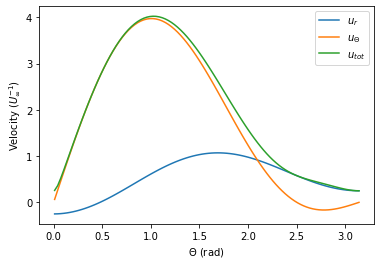

In [85]:
# 
plt.plot(theta, u_r,label='$u_r$')
plt.plot(theta, u_th,label='$u_{\Theta}$')
plt.plot(theta,u_t,label='$u_{tot}$')
plt.xlabel('$\Theta$ (rad)')
plt.ylabel('Velocity ($U_\infty^{-1}$)')
plt.legend()

$4*U_\infty$ seems high for the accelerated flow near the drop. Both velocities go to zero at $r=a$, but not to 1 when $r\rightarrow\infty$. Find my mistake?

## Question 2

Continuing, the drag force within the Oseen regime can be calculated from the pressure field, following Eq. 8.32 (Wang, 2012)

$$
F_{D,Os} = 6\pi\eta aU_\infty\left(1+\frac{3}{16}N_{Re}\right)
$$

where 

$$
N_{Re} = \frac{2\rho_a U_\infty a}{\eta}
$$

Using this drag force, calculate the terminal sedimentation velocity of a $40 \mu m$ (diameter?) spherical solid aerosol particle that sediments under the infuence of gravity and friction. Is its sedimentation laminar or turbulent?

If the particle is falling at terminal velocity, gravitational force (mass times gravity) is equal to drag, ie

$$
F_{D,Os} = F_g
$$

$$
6\pi\eta aU_\infty\left(1+\frac{3}{16}N_{Re}\right) = \frac{4}{3}\pi a^3 \rho_{p}g
$$

note $\rho_{a}$ is the density of air ($\approx 1kg/m^3$) and $\rho_p$ is the density of the particle ($2700 kg/m^3$). Cross out some terms and substitute the expression for $N_{Re}$:

$$
6\pi\eta aU_\infty\left(1+\frac{3}{16}\frac{2\rho_a U_\infty a}{\eta}\right) = \frac{4}{3}\pi a^3 \rho_{p}g
$$

$$
\frac{3\rho_a a}{8\eta}U_\infty^2 + U_\infty - \frac{2a^2\rho_pg}{9\eta} = 0
$$

Now solve the formula to find the roots, or alternately use a handy polynomial function in python

In [5]:
a = 20e-6  # m
g = 9.81 #m/s2
dens_p = 2700  # kg/m3
dens_a = 1.0  # kg/m3
eta = 1.754e-5  # https://www.engineersedge.com/physics/viscosity_of_air_dynamic_and_kinematic_14483.htm

coeffs = [(3 * dens_a * a / (8 * eta)), 1, (-2 * a ** 2 * dens_p * g / (9 * eta))]
the_answer = np.roots(coeffs)[1]

print(f'Terminal velocity of the particle is {round(the_answer,3)} m/s')

Terminal velocity of the particle is 0.127 m/s


Use this velocity to calculate the Reynolds number of the flow:

In [6]:
Re = 2 * dens_a * a * the_answer / eta
print(f'The Reynolds number of the flow is {round(Re,3)}')

The Reynolds number of the flow is 0.29


So the flow is safely within the laminar limit.

How does the terminal sedimentation velocity assuming Oseen flow compare to the terminal sedimentation velocity assuming Stokes flow? The drag force due to Stokes flow field
is Eq. 8.26 (Wang, 2012):

$$
F_{D,S} = 6\pi\eta a U_\infty
$$

Again, set drag equal to gravity

$$
6\pi\eta a U_\infty = \frac{4}{3}\pi a^3 \rho_{p}g
$$

$$
U_\infty = \frac{2a^2\rho_pg}{9\eta}
$$

In [7]:
U_stokes = 2 * a ** 2 * dens_p * g / (9 * eta)
print(f'Stokes terminal velocity of the particle is {round(U_stokes,3)} m/s')

Stokes terminal velocity of the particle is 0.134 m/s


Inertial forces are only contributing a small portion of the drag at this low Re, so the correction is fairly small comparing Oseen and Stokes formulae